<a href="https://colab.research.google.com/github/hallemaynard12/Advanced-Business-Analytics-Homework/blob/main/Maynard%2C_Halle_4420_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Compute the summary statistics for a numeric variable of your choosing.**

In [ ]:
# The variable I am choosing is Age

# Installing Packages
#install.packages(c('vtable', 'readxl'))

library('vtable')
library('readxl')

# Read the data using the readxl package
mkt_data <- read_excel('/content/sample_data/CreditRiskData.xlsx')

# Get summary statistics for age variable
summary(mkt_data$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   18.0    26.0    32.0    34.4    41.0    73.0 

# **2. Compute the conventional precentiles of the variable you selected in question 1.**





In [ ]:
# Computing conventional percentiles for age variable
print(quantile(mkt_data$Age, probs=c(0.05, 0.25, 0.50, 0.75, 0.95)))

 5% 25% 50% 75% 95% 
 21  26  32  41  56 


# **2a. Explain what information you get with the 25th percentile. What does that say about whether they might default or not?**

*The 25th percentile value is 26. This tells us that of the people in this data set, 25% of them are 26 years old and younger. This tells us that those 26 and older have a higher chance of defaullting while those in the 25th percentile are less likely.*

# **3. Provide a boxplot of the variable you selected in question 1. Explain the information from the boxplot. What does that say about whether they might default or not?**

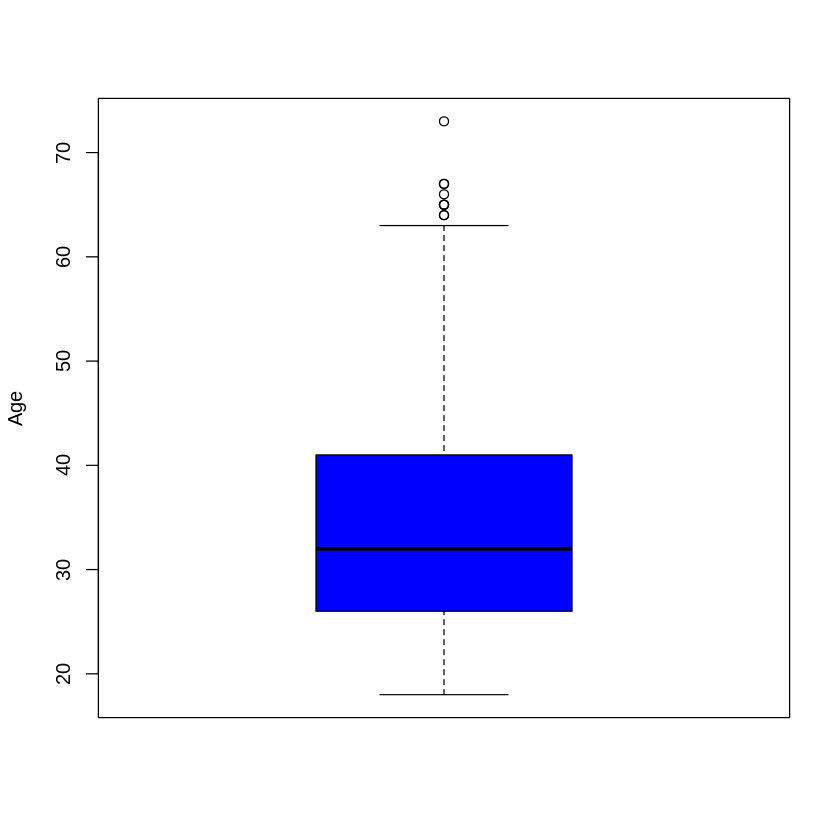

In [ ]:
# Get a boxplot of age
boxplot(mkt_data$Age, col = 'blue', ylab = 'Age')

*Based on the boxplot above, most people in this data set are aged between 26 and 41. The median of this data set is 32. There are a few outliers closer to ages 60 to 70. Overall, those ages 26 to 41 are more likely to default.*

# **4. Provide a histogram (without a density) of the variable you selected in question 1. What does that say about the distrabution of the variable you selected? What does that say about whether they might default or not?**

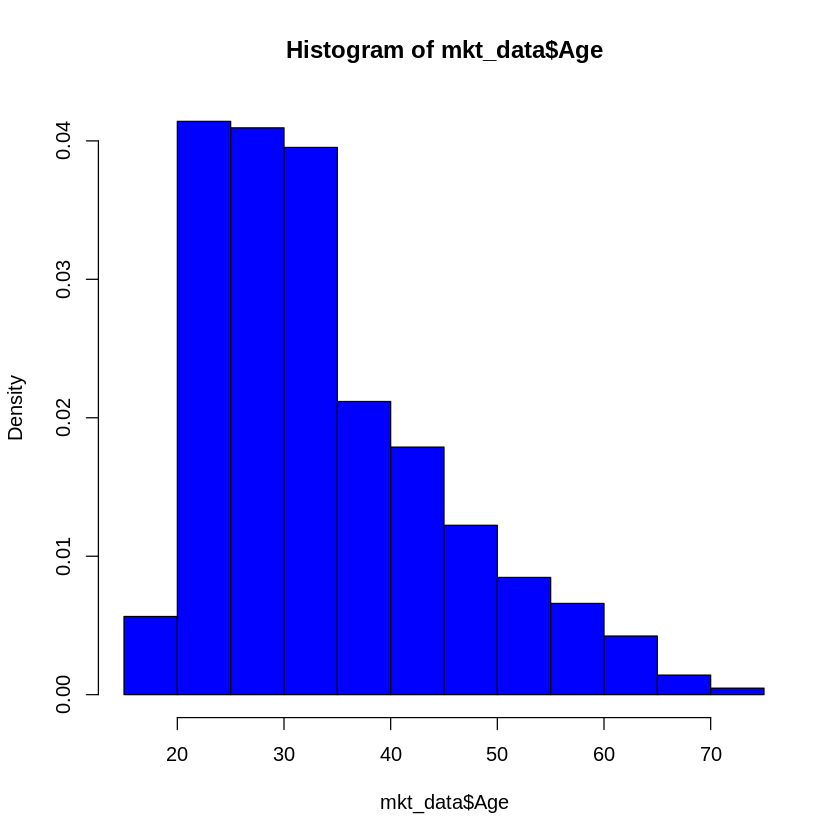

In [ ]:
# Making the histogram
hist(mkt_data$Age, col = 'blue', freq = FALSE)

*Based on the histogram, the age of the people in this data set is slightly skewed to the right or positively skewed. This tells us that many people in this data set are younger. This tells us that those between ager 20 and 35 are more likely to default over the other age groups.*

# **5. Provide a frequency table AND a bar chart for a categorical variable of your choice. What does this say about whether they might default or not?**

In [ ]:
# For this problem I am choosing the Job variable

# Get a Contengency Table for Job
#install.packages("janitor")

library("janitor")

#Get a frequency table, %<% = "Then", allows R to change functions
tabyl(mkt_data$Job)%>%
  adorn_totals("row") %>%
  adorn_pct_formatting(digits = 2)

,mkt_data$Job,n,percent
,<chr>,<dbl>,<chr>
1,Management,54,12.71%
2,Skilled,271,63.76%
3,Unemployed,11,2.59%
4,Unskilled,89,20.94%
5,Total,425,100.00%


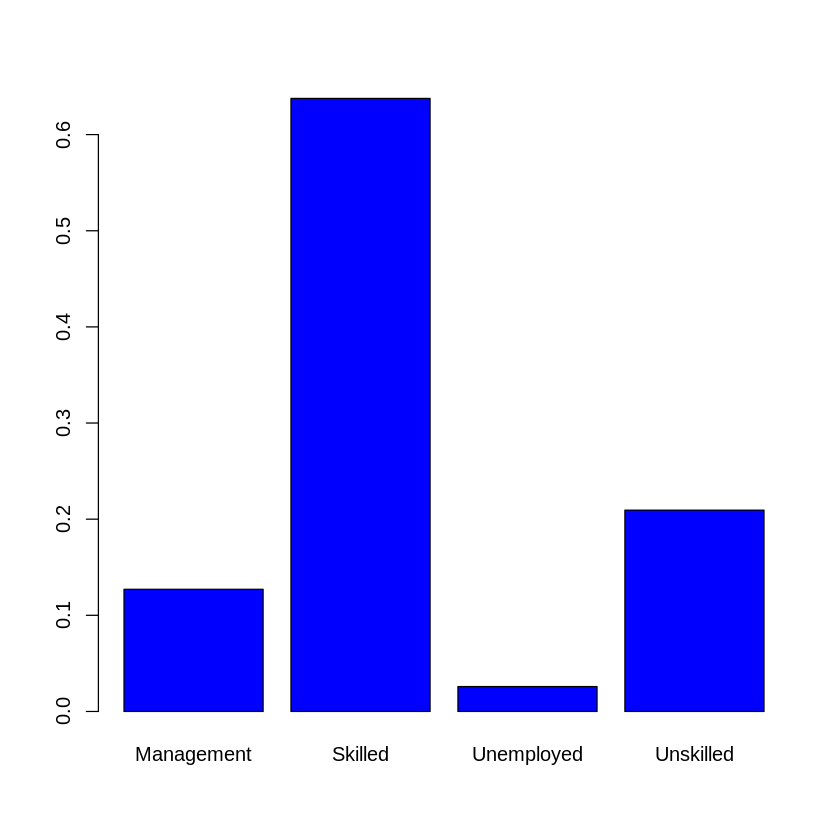

In [ ]:
barplot(prop.table(table(mkt_data$Job)), col = 'blue')

*From both the frequency table and the bar chart, we can see that more skilled people are more likely to default. This interests me as you would think it would be the opposite, considering that if they are more skilled, they are deemed more intelligent than the other groups.*

# **6. Provide a scatterplot using the variable you selected in question 1 and another numeric variable you chose. What does the scatter plot tell you about the relationship between the two numeric variables?**

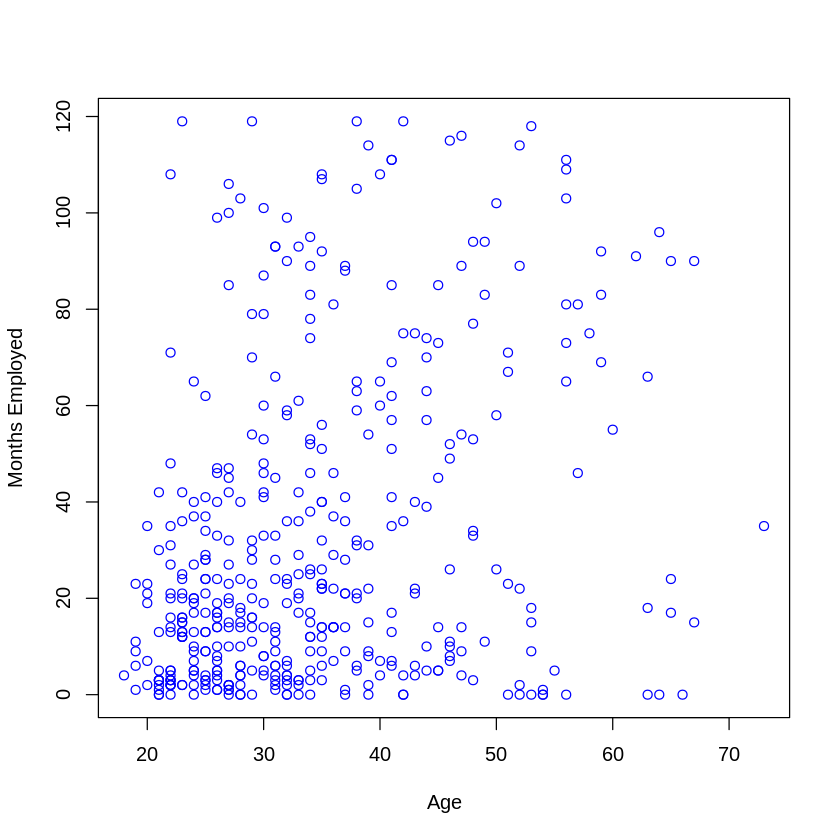

In [ ]:
# Scatterplot between Age and Savings
plot(mkt_data$Age, mkt_data$Months.Employed, xlab = 'Age', ylab = 'Months Employed', col = 'blue')

*Based on the scatter plot, those who are younger and have been employed for less months have a higher chance of defaulting.*

# **7. Provide a scatterplot using the "Credit Risk" variable as your categorical variable. What does it tell you about the credit risk of the borrowers?**

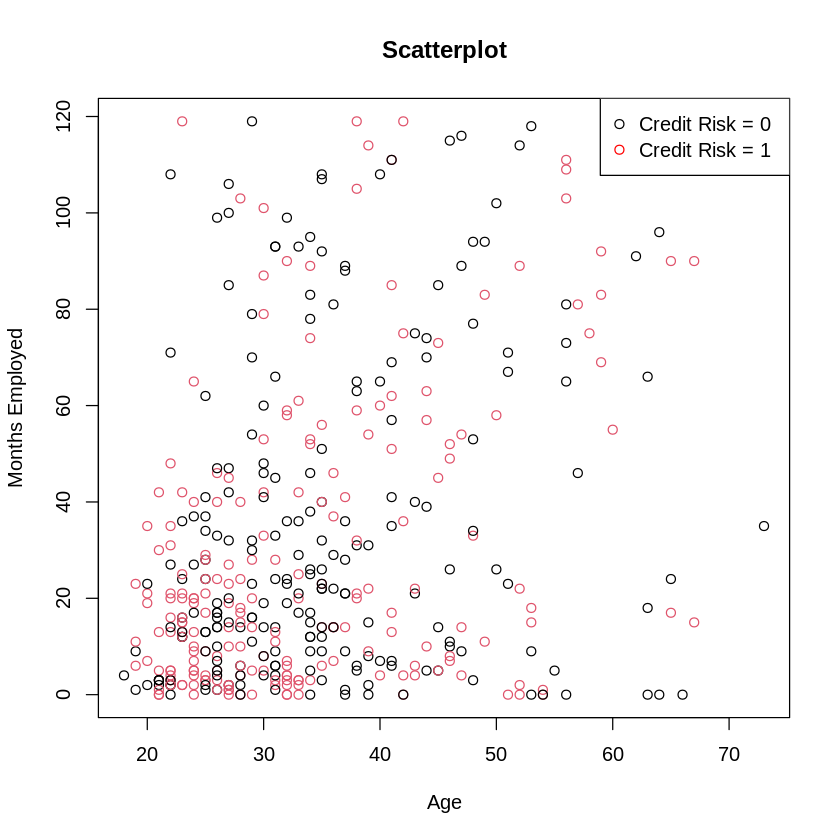

In [ ]:
# Scatterplot between Age and Savings eith Credit Risk as the categorical variable
# Use the options(scipen = ) function to give us the correct values for the y axis.
options(scipen = 10000)

plot(mkt_data$Age, mkt_data$`Months Employed`, col = factor(mkt_data$`Credit Risk`), xlab = "Age", ylab = "Months Employed", main = "Scatterplot")
legend("topright", legend = c('Credit Risk = 0', 'Credit Risk = 1'), pch = 1, col = c('black', 'red'), box.lty = 1)

*Because we have added "Credit Risk" as our categorical variable, we can now see that those whose circle is black have a low credit risk while those whose circle is red have a higher credit risk. This means that they are more likely to default.*

# **8. Provide a correlation heat map for all the numeric variables in the data.**

Checking,Savings,Months Customer,Months Employed,Age,Years,Credit Risk
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,739,13,12,23,3,0
0,1230,25,0,32,1,1
0,389,19,119,38,4,1
638,347,13,14,36,2,1
963,4754,40,45,31,3,0
2827,0,11,13,25,1,0


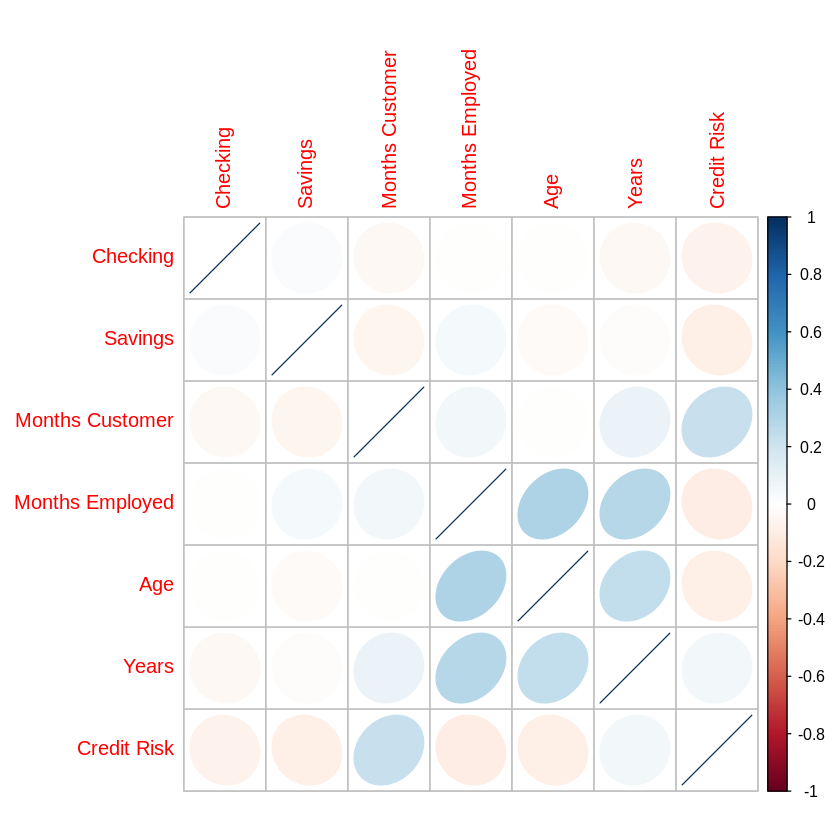

In [ ]:
#install.packages("corrplot")
library("corrplot")

# Get all numeric variables
mkt_numeric <- Filter(is.numeric, mkt_data)
head(mkt_numeric)

# Correlation Plot
corrplot(cor(mkt_numeric), method = 'ellipse')

# **9. Provide a crosstab (a contengency table) using the categorical variable in question 5 and another categorical variable of your choice. What information does this table provide for you? Interperate some of the values.**

In [ ]:
# Crosstab using the Job variable and Marital Status
#install.packages("descr")
library("descr")

# Getting a crosstab of Job and Marital Status
# Defining the crosstab
crossTab <- CrossTable(mkt_data$Job, mkt_data$`Marital Status`, prop.c = FALSE, prop.chisq = FALSE, prop.t = FALSE)
crossTab



   Cell Contents 
|-------------------------|
|                       N | 
|           N / Row Total | 
|-------------------------|

                mkt_data$`Marital Status`
mkt_data$Job    Divorced   Married   Single   Total
---------------------------------------------------
Management            15         2       37      54
                   0.278     0.037    0.685   0.127
---------------------------------------------------
Skilled              102        24      145     271
                   0.376     0.089    0.535   0.638
---------------------------------------------------
Unemployed             7         1        3      11
                   0.636     0.091    0.273   0.026
---------------------------------------------------
Unskilled             32         9       48      89
                   0.360     0.101    0.539   0.209
---------------------------------------------------
Total                156        36      233     425

*In this crosstabulation, marital status and jobs are being compared.This shows us the relationships between the two variables and how it compares to the total.*

# **10. Pick one of the numeric and categorical variables from question 6 and question 9. Provide the numeric variable's minimum, average, and maximum by the categorical variable.**

In [ ]:
# Get the minimum, maximum, and average of the "Age" numeric variable compared to the "Marital Status" categorical variable.
#install.packages("dplyr")
library("dplyr")

# Creating a table
by_status <- mkt_data %>%
  group_by(mkt_data$`Marital Status`) %>%
  summarize(nobs = n(),
            nobs_pct = nobs/sum(nobs),
            avg_age = mean(Age, na.rm = TRUE),
            min_age = min(Age),
            max_age = max(Age))

by_status

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



mkt_data$`Marital Status`,nobs,nobs_pct,avg_age,min_age,max_age
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Divorced,156,1,32.65385,18,66
Married,36,1,28.86111,19,53
Single,233,1,36.42060,20,73


# **11. Conduct a bootstrapped sampling of the mean difference of "savings" across "credit risk".**

In [ ]:
# Conduct a bootstrapped sampling of savings and credit risk
#install.packages("mosaic")
library("mosaic")

# Doing a single bootsrapp
mkt_boot <- mosaic::resample(mkt_data)

# Getting "Savings" across "Credit Risk"
print(mean(Savings ~ `Credit Risk`, data = mkt_data))


       0        1 
2132.617 1487.957 


# **11a. What is the mean difference across "credit risk"? Do the savings differ across groups? How or how not?**

In [ ]:
# Getting the difference in the mean
cat("Mean difference of bootstrapped sample:", diffmean(Savings ~ `Credit Risk`, data = mkt_boot))

Mean difference of bootstrapped sample: -1313.055

# **11b. Construct a bootstrapped techniqure using a sample size of 10,000.**

In [ ]:
# Conduct a bootstrapped technique with a sample size of 10,000.
mkt_bt10k <- do(10000) * diffmean(Savings ~ `Credit Risk`, data = mosaic::resample(mkt_data))

mkt_bt10k

diffmean
<dbl>
-540.91629
-625.80366
-696.87071
-731.45201
-1108.84843
-484.20803
-496.72602
-769.03626
-468.92106


# **11c. Provide a histogram of the mean difference.**

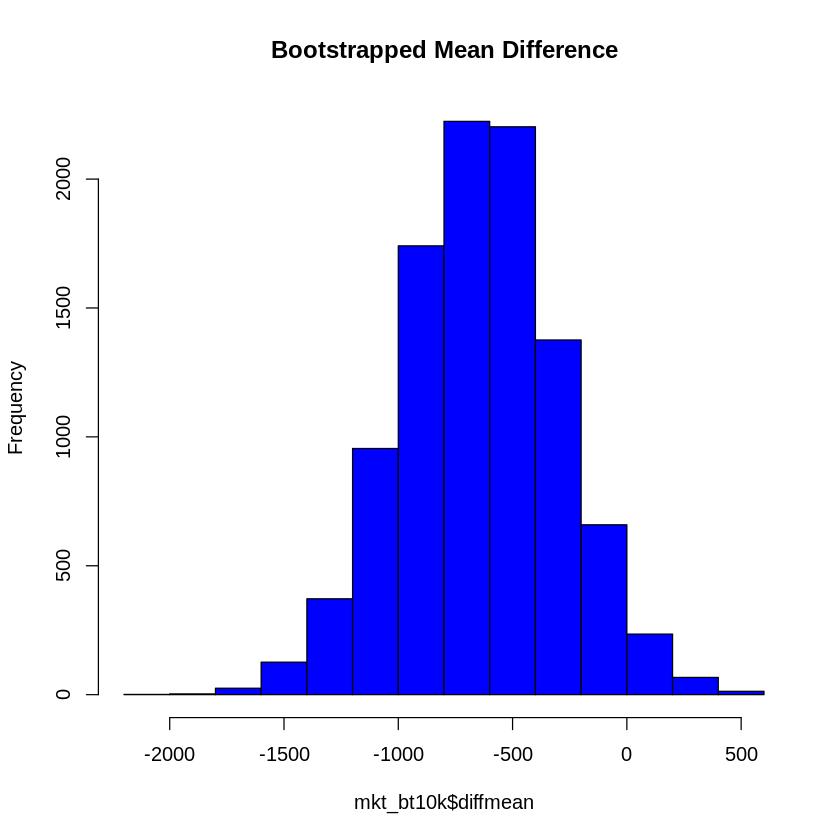

In [ ]:
# Histogram of the mean difference.
hist(mkt_bt10k$diffmean, col = 'blue', main = "Bootstrapped Mean Difference")

# **11d. Provide a standard error and a 99% confidence interval.**

In [ ]:
# Standard error and 99% confidence interval
# Standard error // used with 10000 bootstrapp sample
mkt_bt10k %>%
  summarize(Savings_StdErr = sd(diffmean))

# Confidence interval
print(confint(mkt_bt10k, level = 0.99))

Savings_StdErr
<dbl>
343.7914


      name     lower    upper level     method  estimate
1 diffmean -1546.933 251.7752  0.99 percentile -528.3614
